In [1]:
import numpy as np
import math
import cmath
#import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

#### Discrete Fourier transform and Inverse Discrete Fourier transform

In [2]:
from numpy.linalg import inv
def DFT_Matrix(N):
    W = np.ndarray((N,N),dtype = complex)
    for i in range(N):
        for j in range(N):
            W[i][j] = cmath.exp(complex(0,float(-2*math.pi/N*i*j)))
    return W

In [3]:
def DFT(N,x):
    x = x.transpose()
    W=DFT_Matrix(N)
    X=np.matmul(W,x)
    return X

In [4]:
def IDFT(N,X):
    W=DFT_Matrix(N)
    W1 = inv(W)
    x=np.matmul(W1,X)
    return x

#### Discrete Cosine transform and Inverse Discrete Cosine transform

In [5]:
def DCT(N,x):
    x = x.transpose()
    D1=[]
    for k in range(N):
        d=[]
        for n in range(N):
            d.append(np.cos(((math.pi)*k*(2*n+1))/(2*N)))
        D1.append(d)
    X=np.matmul(D1,x)
    X=np.multiply(X,2)
    return X

In [6]:
def IDCT(N,X):
    D=[]
    for n in range(N):
        d=[]
        for k in range(N):
            d.append(np.cos(((math.pi)*k*(2*n+1))/(2*N)))
        D.append(d)
    X1=[]
    a=[]
    a.append(0.5)
    for i in range(N-1):
        a.append(1)
    for i in range(N):
        X1.append(X[i]*a[i])
    x=np.matmul(D,X1)
    x=np.divide(x,N)
    return x

#### Haar transform and Inverse Haar transform

In [7]:
def Haar_Matrix(n):
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = Haar_Matrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    h_n = np.kron(h, [1, 1])
    h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    h = np.vstack((h_n, h_i))
    return h

In [8]:
def HT(N,x):
    H=Haar_Matrix(N)
    X=np.matmul(H,x)
    return X

In [9]:
def IHT(N,X):
    H=Haar_Matrix(N)
    x=np.matmul(inv(H),X)
    return x

#### Mean Absolute Error

In [10]:
def MeanError(x1,x2):
    x1=np.array(x1)
    x2=np.array(x2)
    return np.mean((abs(x1-x2))**2)

#### Energy Compaction Properties of transforms

In [11]:
L=[]
for i in range(0,7):
    L.append(10*i)

In [12]:
def X_m1(X,L):
    Xm1=[]
    N=len(X)
    for i in range(N):
        if i<=int((N-1-L)/2):
            Xm1.append(X[i])
        elif i>=int((N+1-L)/2) and i<=int((N-1+L)/2):
            Xm1.append(0)
        elif i>=int((N+1+L)/2) and i<=N-1:
            Xm1.append(X[i])
    return Xm1

In [13]:
def X_m2(X,L):
    N=len(X)
    Xm2=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm2.append(X[i])
        else:
            Xm2.append(0)
    return Xm2

In [14]:
def X_m3(X,L):
    N=len(X)
    Xm3=[]
    for i in range(N):
        if i<=(N-1-L):
            Xm3.append(X[i])
        else:
            Xm3.append(0)
    return Xm3

In [15]:
N=64
Z=20
E1=[]
E2=[]
E3=[]

In [16]:
for i in range(len(L)):
    k=L[i]
    x=np.random.randint(100,size=N)
    X1=DFT(N,x)
    e=0
    for z in range(Z):
        Xm1=X_m1(X1,k)
        xm1=IDFT(N,Xm1)
        e=e+MeanError(x,xm1)
    E1.append(e/Z)

    X2=DCT(N,x)
    e=0
    for i in range(Z):
        Xm2=X_m2(X2,k)
        xm2=IDCT(N,Xm2)
        e=e+MeanError(x,xm2)
    E2.append(e/Z)

    X3=HT(N,x)
    e=0
    for i in range(Z):
        Xm3=X_m3(X3,k)
        xm3=IHT(N,Xm3)
        e=e+MeanError(x,xm3)
    E3.append(e/Z)

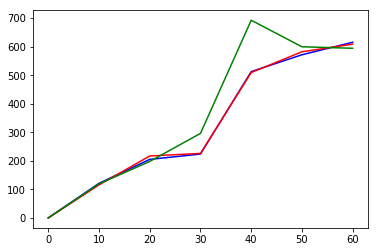

In [20]:
plt.plot(L,E1,'-b')
plt.plot(L,E2,'-r')
plt.plot(L,E3,'-g')